In [3]:
# loads all necessary libraries for the project.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import joblib

import warnings
warnings.filterwarnings('ignore')

import kagglehub

import gradio as gr
import joblib

import os

import shap

from google.colab import drive


print('All neccesary libriaries are imported')

All neccesary libriaries are imported


In [4]:

# load data from Kaggle
path = kagglehub.dataset_download("miadul/medical-cost-predication-dataset")

print("Path to dataset files:", path)

file_name = os.listdir(path)[0]
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)

# data preview
df.head()

100%|██████████| 118k/118k [00:00<00:00, 35.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/miadul/medical-cost-predication-dataset/versions/1


,age,gender,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_type,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost
0,69,Male,29.4,No,1,0,0,0,Medium,14825,4.4,8,1,0,4,Private,80,Semi-Urban,10885,2645.50
1,32,Female,22.9,No,1,0,0,0,Medium,3620,6.0,7,4,3,0,Government,64,Semi-Urban,18722,10959.70
2,89,Male,25.7,No,0,0,0,0,High,10578,4.5,7,2,0,3,NaN,0,Urban,4196,8409.80
3,78,Male,31.9,Yes,0,1,0,0,Low,6226,8.6,9,6,1,7,Government,70,Urban,11128,7996.62
4,38,Male,27.7,No,0,0,0,0,High,6253,5.7,3,6,0,6,Private,77,Urban,15110,3202.52


In [5]:
# information about the number of rows and columns in the dataframe

print(f'Dataset shape: {df.shape}')
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(f'Columns name: \n {df.columns}')

Dataset shape: (5000, 20)
Number of rows: 5000
Number of columns: 20
Columns name: 
 Index(['age', 'gender', 'bmi', 'smoker', 'diabetes', 'hypertension',
       'heart_disease', 'asthma', 'physical_activity_level', 'daily_steps',
       'sleep_hours', 'stress_level', 'doctor_visits_per_year',
       'hospital_admissions', 'medication_count', 'insurance_type',
       'insurance_coverage_pct', 'city_type', 'previous_year_cost',
       'annual_medical_cost'],
      dtype='object')


In [6]:
# preliminary check of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   smoker                   5000 non-null   object 
 4   diabetes                 5000 non-null   int64  
 5   hypertension             5000 non-null   int64  
 6   heart_disease            5000 non-null   int64  
 7   asthma                   5000 non-null   int64  
 8   physical_activity_level  5000 non-null   object 
 9   daily_steps              5000 non-null   int64  
 10  sleep_hours              5000 non-null   float64
 11  stress_level             5000 non-null   int64  
 12  doctor_visits_per_year   5000 non-null   int64  
 13  hospital_admissions      5000 non-null   int64  
 14  medication_count        

In [7]:
# remove duplicate rows

row_before_drop_duplicate = df.shape[0]
df = df.drop_duplicates()
row_after_drop_duplicate = df.shape[0]
print(f'Number of duplicate rows: {row_before_drop_duplicate - row_after_drop_duplicate}')

Number of duplicate rows: 0


In [ ]:
# preliminary check of the column of numbers distribution
df.describe()

,age,bmi,diabetes,hypertension,heart_disease,asthma,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,previous_year_cost,annual_medical_cost
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,53.299000,25.970820,0.207600,0.288000,0.14220,0.096400,7993.216800,6.488140,5.475400,4.030600,1.001000,3.509000,57.953000,10248.515400,8048.886894
std,20.646851,5.046651,0.405629,0.452876,0.34929,0.295169,4052.127069,1.443361,2.892312,2.010689,0.978566,2.292721,31.627742,5626.095015,7071.020228
min,18.000000,6.400000,0.000000,0.000000,0.00000,0.000000,1004.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,404.950000
25%,36.000000,22.600000,0.000000,0.000000,0.00000,0.000000,4545.000000,5.200000,3.000000,3.000000,0.000000,1.000000,53.000000,5342.750000,3241.977500
50%,53.000000,25.900000,0.000000,0.000000,0.00000,0.000000,7989.000000,6.500000,5.000000,4.000000,1.000000,3.000000,71.000000,10281.000000,5539.780000
75%,71.000000,29.400000,0.000000,1.000000,0.00000,0.000000,11532.250000,7.700000,8.000000,5.000000,2.000000,6.000000,79.000000,15034.500000,10094.097500
max,89.000000,43.600000,1.000000,1.000000,1.00000,1.000000,14999.000000,9.000000,10.000000,14.000000,6.000000,7.000000,94.000000,19996.000000,44792.100000


In [8]:
# get unique values from categorical columns
for column in df.select_dtypes('object'):
    print(f'{column}: {df[column].unique()}')

gender: ['Male' 'Female']
smoker: ['No' 'Yes']
physical_activity_level: ['Medium' 'High' 'Low']
insurance_type: ['Private' 'Government' nan]
city_type: ['Semi-Urban' 'Urban' 'Rural']


In [ ]:
# check the DataFrame for missing values
df.isna().sum()

,0
age,0
gender,0
bmi,0
smoker,0
diabetes,0
hypertension,0
heart_disease,0
asthma,0
physical_activity_level,0
daily_steps,0


In [9]:
# replace missing values in 'insurance_type' column to "Unknown"
df['insurance_type']=df['insurance_type'].fillna('Unknown')

In [10]:
# Create a preprocessing pipeline:
# - Encode categorical features using One-Hot Encoding
# - Keep numerical features unscaled, as tree-based models
#   (Random Forest and Gradient Boosting) are not sensitive to feature scaling

categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(exclude='object').drop(columns=['annual_medical_cost']).columns

categorical_features = list(categorical_features)
numerical_features = list(numerical_features)

X = df[categorical_features + numerical_features]
y = df['annual_medical_cost']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)



In [11]:
# create and train RandomForestRegressor model

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=200,random_state=42))
])

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# display model metrics
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest:
MAE: 629.0797924000002
RMSE: 1017.4065200064967
R2: 0.9787783642945553


In [12]:
# create and train GradientBoostingRegressor model
model_gb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingRegressor(n_estimators=200,random_state=42))
    ]
)

model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

# display model metrics
print("Gradient Boosting Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2:", r2_score(y_test, y_pred_gb))

Gradient Boosting Regressor:
MAE: 275.1569241049078
RMSE: 453.9799814424259
R2: 0.9957746447575032


In [13]:

estimators = [
    ('rf', model_rf),
    ('gb', model_gb),
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

stack.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('cat',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ['gender',
                                                                                  'smoker',
                                                                                  'physical_activity_level',
                                                                                  'insurance_type',
                                                                                  'city_type']),
                                                                                ('num',
                                                                                 'passthrough',
                                                                                 ['age',
                                                                                  'bmi',
                                                                                  'diabetes',
                                                                                  'hypertension',
                                                                                  'heart_disease',
                                                                                  'asthma',
                                                                                  'daily_steps',
                                                                                  'sleep_hours',
                                                                                  'stress_level',...
                                                                                  'city_type']),
                                                                                ('num',
                                                                                 'passthrough',
                                                                                 ['age',
                                                                                  'bmi',
                                                                                  'diabetes',
                                                                                  'hypertension',
                                                                                  'heart_disease',
                                                                                  'asthma',
                                                                                  'daily_steps',
                                                                                  'sleep_hours',
                                                                                  'stress_level',
                                                                                  'doctor_visits_per_year',
                                                                                  'hospital_admissions',
                                                                                  'medication_count',
                                                                                  'insurance_coverage_pct',
                                                                                  'previous_year_cost'])])),
                                               ('classifier',
                                                GradientBoostingRegressor(n_estimators=200,
                                                                          random_state=42))]))],
                  final_estimator=Ridge())

In [14]:
stack_predict=stack.predict(X_test)
print("Stacking Regressor:")
print("MAE:", mean_absolute_error(y_test, stack_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, stack_predict)))
print("R2:", r2_score(y_test, stack_predict))

Stacking Regressor:
MAE: 277.2409006398646
RMSE: 429.3625697893538
R2: 0.9962204666194789


In [21]:
drive.mount('/content/drive')
rf_model_filename = '/content/drive/MyDrive/staking_model.joblib'
joblib.dump(stack, rf_model_filename)

X_background = df

joblib.dump(X_background, "/content/drive/MyDrive/X_background.pkl")
joblib.dump(preprocessor, "/content/drive/MyDrive/preprocessor.pkl")
joblib.dump(model_rf, "/content/drive/MyDrive/rf_model.joblib")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/rf_model.joblib']

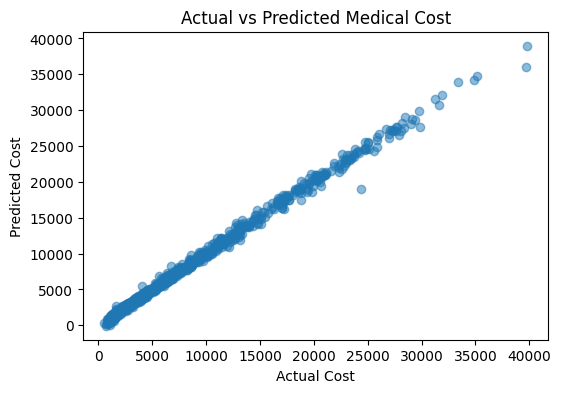

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, stack_predict, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted Medical Cost")
plt.show()